In [1]:
import pandas as pd
import numpy as np
from Inicializacion import Inicializacion
import Prediction
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
df_train = pd.read_csv('00-df_final_ok.csv')
df_test = pd.read_csv('01-df_final_test_ok.csv')


In [3]:
df_train.drop(columns=['Unnamed: 0'],inplace=True)
df_test.drop(columns=['Unnamed: 0'],inplace=True)
x_cols = [x for x in df_train.columns if x !='precio' and x!='id']
#y_train = df_train['precio']/df_train['precio'].sort_values(ascending=False).iloc[0]
y_train = df_train['precio']


In [4]:
x_train = df_train.loc[:,x_cols]

x_test = df_test.loc[:,x_cols]


In [5]:
scaler = MinMaxScaler()

In [6]:
x_train = scaler.fit_transform(x_train)
pickle.dump(scaler, open("models/00-scaler-minmax.pickle", "wb"))
scaler = pickle.load(open("models/00-scaler-minmax.pickle", 'rb'))
x_test = scaler.transform(x_test)
#y_train = scaler.fit_transform(y_train)

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
#y_train = pd.DataFrame(y_train)

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [22]:
xgb = XGBRegressor(min_child_weight = 4,
                   gamma=0.5,
                   subsample=0.8,
                   colsample_bytree =0.75,
                   max_depth= 6,
                   n_estimators=1200,
                   learning_rate=0.08,
                   colsample_bynode=0.8,
                   colsample_bylevel=0.8,
                   n_jobs=-1,
                   random_state=42,
                  )

In [23]:
eval_set = [(x_train, y_train), (x_val, y_val)]
xgb.fit(x_train,y_train,eval_metric='mae', eval_set=eval_set, verbose=True)# make predictions for test data



[10:50:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:2.26512e+06	validation_1-mae:2.26809e+06
[1]	validation_0-mae:2.08401e+06	validation_1-mae:2.08715e+06
[2]	validation_0-mae:1.91826e+06	validation_1-mae:1.92202e+06
[3]	validation_0-mae:1.7677e+06	validation_1-mae:1.77208e+06
[4]	validation_0-mae:1.63162e+06	validation_1-mae:1.63603e+06
[5]	validation_0-mae:1.50933e+06	validation_1-mae:1.51379e+06
[6]	validation_0-mae:1.40048e+06	validation_1-mae:1.405e+06
[7]	validation_0-mae:1.30422e+06	validation_1-mae:1.30877e+06
[8]	validation_0-mae:1.21986e+06	validation_1-mae:1.22487e+06
[9]	validation_0-mae:1.14533e+06	validation_1-mae:1.15094e+06
[10]	validation_0-mae:1.07996e+06	validation_1-mae:1.08552e+06
[11]	validation_0-mae:1.0239e+06	validation_1-mae:1.0298e+06
[12]	validation_0-mae:976075	validation_1-mae:982072
[13]	validation_0-mae:934604	validation_1-mae:940639
[14]	validation_0-mae:8984

[150]	validation_0-mae:602754	validation_1-mae:621145
[151]	validation_0-mae:602632	validation_1-mae:621127
[152]	validation_0-mae:602393	validation_1-mae:621016
[153]	validation_0-mae:602024	validation_1-mae:620742
[154]	validation_0-mae:601905	validation_1-mae:620700
[155]	validation_0-mae:601515	validation_1-mae:620374
[156]	validation_0-mae:600473	validation_1-mae:619310
[157]	validation_0-mae:599990	validation_1-mae:618788
[158]	validation_0-mae:599778	validation_1-mae:618637
[159]	validation_0-mae:599557	validation_1-mae:618485
[160]	validation_0-mae:599245	validation_1-mae:618250
[161]	validation_0-mae:599050	validation_1-mae:618168
[162]	validation_0-mae:598935	validation_1-mae:618152
[163]	validation_0-mae:598772	validation_1-mae:618129
[164]	validation_0-mae:598544	validation_1-mae:618009
[165]	validation_0-mae:598364	validation_1-mae:617950
[166]	validation_0-mae:597895	validation_1-mae:617606
[167]	validation_0-mae:597646	validation_1-mae:617467
[168]	validation_0-mae:59749

[302]	validation_0-mae:574151	validation_1-mae:604864
[303]	validation_0-mae:574029	validation_1-mae:604885
[304]	validation_0-mae:573869	validation_1-mae:604826
[305]	validation_0-mae:573770	validation_1-mae:604824
[306]	validation_0-mae:573630	validation_1-mae:604780
[307]	validation_0-mae:573548	validation_1-mae:604744
[308]	validation_0-mae:573420	validation_1-mae:604656
[309]	validation_0-mae:573324	validation_1-mae:604645
[310]	validation_0-mae:573113	validation_1-mae:604515
[311]	validation_0-mae:572897	validation_1-mae:604346
[312]	validation_0-mae:572820	validation_1-mae:604361
[313]	validation_0-mae:572733	validation_1-mae:604396
[314]	validation_0-mae:572568	validation_1-mae:604309
[315]	validation_0-mae:572458	validation_1-mae:604301
[316]	validation_0-mae:572355	validation_1-mae:604236
[317]	validation_0-mae:572224	validation_1-mae:604203
[318]	validation_0-mae:572044	validation_1-mae:604137
[319]	validation_0-mae:571933	validation_1-mae:604102
[320]	validation_0-mae:57184

[454]	validation_0-mae:554250	validation_1-mae:596143
[455]	validation_0-mae:554107	validation_1-mae:596104
[456]	validation_0-mae:554024	validation_1-mae:596085
[457]	validation_0-mae:553918	validation_1-mae:596040
[458]	validation_0-mae:553795	validation_1-mae:596017
[459]	validation_0-mae:553687	validation_1-mae:595943
[460]	validation_0-mae:553630	validation_1-mae:595963
[461]	validation_0-mae:553550	validation_1-mae:595982
[462]	validation_0-mae:553374	validation_1-mae:595914
[463]	validation_0-mae:553265	validation_1-mae:595874
[464]	validation_0-mae:553140	validation_1-mae:595813
[465]	validation_0-mae:553054	validation_1-mae:595797
[466]	validation_0-mae:552977	validation_1-mae:595792
[467]	validation_0-mae:552834	validation_1-mae:595760
[468]	validation_0-mae:552536	validation_1-mae:595488
[469]	validation_0-mae:552426	validation_1-mae:595452
[470]	validation_0-mae:552369	validation_1-mae:595441
[471]	validation_0-mae:552277	validation_1-mae:595447
[472]	validation_0-mae:55218

[606]	validation_0-mae:539092	validation_1-mae:591323
[607]	validation_0-mae:539054	validation_1-mae:591340
[608]	validation_0-mae:539014	validation_1-mae:591325
[609]	validation_0-mae:538942	validation_1-mae:591347
[610]	validation_0-mae:538839	validation_1-mae:591338
[611]	validation_0-mae:538759	validation_1-mae:591326
[612]	validation_0-mae:538714	validation_1-mae:591315
[613]	validation_0-mae:538652	validation_1-mae:591324
[614]	validation_0-mae:538581	validation_1-mae:591286
[615]	validation_0-mae:538471	validation_1-mae:591251
[616]	validation_0-mae:538440	validation_1-mae:591255
[617]	validation_0-mae:538338	validation_1-mae:591236
[618]	validation_0-mae:538239	validation_1-mae:591187
[619]	validation_0-mae:538195	validation_1-mae:591172
[620]	validation_0-mae:538091	validation_1-mae:591132
[621]	validation_0-mae:538019	validation_1-mae:591098
[622]	validation_0-mae:537944	validation_1-mae:591114
[623]	validation_0-mae:537844	validation_1-mae:591118
[624]	validation_0-mae:53773

[758]	validation_0-mae:527038	validation_1-mae:588759
[759]	validation_0-mae:526974	validation_1-mae:588768
[760]	validation_0-mae:526926	validation_1-mae:588749
[761]	validation_0-mae:526888	validation_1-mae:588749
[762]	validation_0-mae:526851	validation_1-mae:588792
[763]	validation_0-mae:526817	validation_1-mae:588782
[764]	validation_0-mae:526723	validation_1-mae:588781
[765]	validation_0-mae:526688	validation_1-mae:588799
[766]	validation_0-mae:526598	validation_1-mae:588808
[767]	validation_0-mae:526507	validation_1-mae:588755
[768]	validation_0-mae:526445	validation_1-mae:588764
[769]	validation_0-mae:526371	validation_1-mae:588750
[770]	validation_0-mae:526289	validation_1-mae:588780
[771]	validation_0-mae:526246	validation_1-mae:588762
[772]	validation_0-mae:526164	validation_1-mae:588754
[773]	validation_0-mae:526093	validation_1-mae:588735
[774]	validation_0-mae:526005	validation_1-mae:588711
[775]	validation_0-mae:525953	validation_1-mae:588702
[776]	validation_0-mae:52589

[910]	validation_0-mae:516464	validation_1-mae:587276
[911]	validation_0-mae:516401	validation_1-mae:587294
[912]	validation_0-mae:516349	validation_1-mae:587329
[913]	validation_0-mae:516267	validation_1-mae:587308
[914]	validation_0-mae:516189	validation_1-mae:587309
[915]	validation_0-mae:516130	validation_1-mae:587317
[916]	validation_0-mae:516041	validation_1-mae:587288
[917]	validation_0-mae:515987	validation_1-mae:587322
[918]	validation_0-mae:515926	validation_1-mae:587333
[919]	validation_0-mae:515848	validation_1-mae:587307
[920]	validation_0-mae:515792	validation_1-mae:587300
[921]	validation_0-mae:515756	validation_1-mae:587323
[922]	validation_0-mae:515695	validation_1-mae:587308
[923]	validation_0-mae:515615	validation_1-mae:587290
[924]	validation_0-mae:515586	validation_1-mae:587302
[925]	validation_0-mae:515531	validation_1-mae:587274
[926]	validation_0-mae:515408	validation_1-mae:587203
[927]	validation_0-mae:515323	validation_1-mae:587219
[928]	validation_0-mae:51525

[1061]	validation_0-mae:506177	validation_1-mae:585742
[1062]	validation_0-mae:506117	validation_1-mae:585720
[1063]	validation_0-mae:506058	validation_1-mae:585710
[1064]	validation_0-mae:505999	validation_1-mae:585704
[1065]	validation_0-mae:505926	validation_1-mae:585699
[1066]	validation_0-mae:505918	validation_1-mae:585743
[1067]	validation_0-mae:505832	validation_1-mae:585702
[1068]	validation_0-mae:505735	validation_1-mae:585671
[1069]	validation_0-mae:505693	validation_1-mae:585650
[1070]	validation_0-mae:505635	validation_1-mae:585649
[1071]	validation_0-mae:505552	validation_1-mae:585627
[1072]	validation_0-mae:505460	validation_1-mae:585610
[1073]	validation_0-mae:505403	validation_1-mae:585614
[1074]	validation_0-mae:505345	validation_1-mae:585628
[1075]	validation_0-mae:505264	validation_1-mae:585611
[1076]	validation_0-mae:505222	validation_1-mae:585619
[1077]	validation_0-mae:505176	validation_1-mae:585636
[1078]	validation_0-mae:505129	validation_1-mae:585647
[1079]	val

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=0.8, colsample_bytree=0.75, gamma=0.5,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=1200,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [24]:
y_pred = xgb.predict(x_val)

584851.9450072366


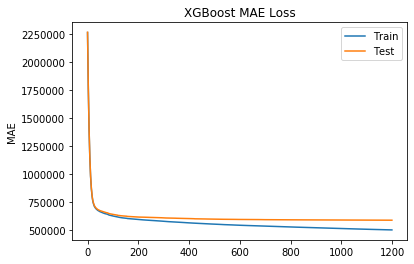

In [25]:
predictions = [round(value) for value in y_pred]
# evaluate predictions

mae = mean_absolute_error(y_val,y_pred)
print(mae)
# retrieve performance metrics
results = xgb.evals_result()
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
plt.ylabel('MAE')
plt.title('XGBoost MAE Loss')
plt.show()


In [12]:
y_test_pred = xgb.predict(x_test)

In [13]:
answer = pd.DataFrame(columns=['id','target'])
answer['id'] = df_test['id']
answer['target'] = y_test_pred
answer.to_csv('submit.csv')